In [2]:
import numpy as np
import pandas as pd


def create_dataframe(no_of_samples):
        nos = no_of_samples
        nos = nos+1
        cols = ["Age", "Gender", "Pincode", "Weight", "Height"]
        df = pd.DataFrame(index = range(1,nos), columns=cols)
        df["Age"] = np.random.randint(0,100,(nos-1,))
        df["Pincode"] = np.random.randint(110000,110100,(nos-1,))
        df["Gender"] = np.random.randint(0,2,(nos-1,))
        df["Weight"] = np.random.randint(20,120,[nos-1,])
        df["Height"] = np.random.randint(50,150,[nos-1,]) 
    
        return df

In [3]:
df  = create_dataframe(322)
df

,Age,Gender,Pincode,Weight,Height
1,53,0,110017,62,80
2,51,0,110068,78,117
3,55,1,110001,98,142
4,44,0,110038,96,51
5,64,0,110060,84,86
...,...,...,...,...,...
318,81,1,110087,84,53
319,89,0,110002,54,51
320,71,0,110016,76,56
321,46,1,110059,48,56


In [4]:
df1 = pd.read_csv("1045.txt", delimiter = "\t")

In [5]:
df1.drop('PubMed occurrence',axis=1,inplace=True)
df1

,MeSH Symptom Term,MeSH Disease Term,TFIDF score
0,"Aging, Premature",Respiratory Syncytial Virus Infections,3.464551
1,"Aging, Premature",Orthomyxoviridae Infections,3.464551
2,"Aging, Premature",HIV Infections,10.393654
3,"Aging, Premature",Acquired Immunodeficiency Syndrome,10.393654
4,"Aging, Premature",Breast Neoplasms,3.464551
...,...,...,...
147973,Hirsutism,Tobacco Use Disorder,2.483722
147974,Hirsutism,Radius Fractures,2.483722
147975,Hirsutism,Burns,2.483722
147976,Hirsutism,Colles' Fracture,2.483722


In [7]:
df1['MeSH Disease Term'].unique().shape

(4219,)

In [8]:
df1['MeSH Symptom Term'].unique().shape

(322,)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [18]:
df1.groupby('MeSH Symptom Term')['MeSH Disease Term'].count().sort_values(ascending=False).head(10)

MeSH Symptom Term
Pain                  2593
Body Weight           2332
Edema                 2238
Fever                 2194
Seizures              1812
Headache              1741
Obesity               1731
Mental Retardation    1706
Vomiting              1662
Vision Disorders      1632
Name: MeSH Disease Term, dtype: int64

In [28]:
df2 = df1.pivot_table(index='MeSH Disease Term',columns='MeSH Symptom Term',values='TFIDF score').fillna(0)
df2.head()

MeSH Symptom Term,"Abdomen, Acute",Abdominal Pain,Acute Coronary Syndrome,Aerophagy,Ageusia,"Aging, Premature",Agnosia,Agraphia,"Akathisia, Drug-Induced",Albuminuria,...,Virilism,Vision Disorders,"Vision, Low",Vocal Cord Paralysis,Voice Disorders,Vomiting,"Vomiting, Anticipatory",Waterhouse-Friderichsen Syndrome,Weight Gain,Weight Loss
MeSH Disease Term,,,,,,,,,,,,,,,,,,,,,
22q11 Deletion Syndrome,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
"46, XX Disorders of Sex Development",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.227056,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
"46, XY Disorders of Sex Development",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.454112,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
"ACTH Syndrome, Ectopic",0.0,0.848484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.48669,1.000054
ACTH-Secreting Pituitary Adenoma,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.663489,0.0,0.0,0.0,0.0,0.0,0.0,1.48669,0.000000


In [42]:
one = df2['Vision Disorders']
two = df2['Voice Disorders']
one.head()

MeSH Disease Term
22q11 Deletion Syndrome                0.000000
46, XX Disorders of Sex Development    0.000000
46, XY Disorders of Sex Development    0.000000
ACTH Syndrome, Ectopic                 0.000000
ACTH-Secreting Pituitary Adenoma       0.663489
Name: Vision Disorders, dtype: float64

In [43]:
one1 = df2.corrwith(one)
one2 = df2.corrwith(two)

In [44]:
corr = pd.DataFrame(one1,columns=['Correlation'])
corr.dropna(inplace=True)
corr.head()

,Correlation
MeSH Symptom Term,
"Abdomen, Acute",-0.000386
Abdominal Pain,0.000851
Acute Coronary Syndrome,-0.000657
Aerophagy,0.001608
Ageusia,0.002623


In [45]:
corr.sort_values('Correlation',ascending=False).head(10)

,Correlation
MeSH Symptom Term,
Vision Disorders,1.000000
Eye Manifestations,0.269701
Scotoma,0.229335
Pseudophakia,0.227985
Hemianopsia,0.145685
Susac Syndrome,0.141569
Diplopia,0.112457
Illusions,0.109010
"Alexia, Pure",0.103234


In [46]:
from scipy.sparse import csr_matrix

df3 = csr_matrix(df2.values)

In [47]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df3)

NearestNeighbors(algorithm='brute', metric='cosine')

In [48]:
df2.shape

(4219, 322)

In [51]:
query_index = np.random.choice(df2.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(df2.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

3902


In [52]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df2.index[query_index]))
    else:
        print('{0}: {1},  with distance of {2}:'.format(i,df2.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Tooth Fractures:

1: Toothache,  with distance of 0.00882591374511077:
2: Cracked Tooth Syndrome,  with distance of 0.008931685987983107:
3: Dental Pulp Diseases,  with distance of 0.009555099667658329:
4: Pulpitis,  with distance of 0.009586013932559423:
5: Dental Pulp Calcification,  with distance of 0.011725520590291194:


In [33]:
mergedf=pd.concat([df,df1],axis=0,sort=False)

In [34]:
mergedf.head()

,Age,Gender,Pincode,Weight,Height,MeSH Symptom Term
1,46.0,1.0,110098.0,111.0,89.0,NaN
2,22.0,0.0,110040.0,85.0,88.0,NaN
3,35.0,1.0,110095.0,24.0,141.0,NaN
4,92.0,1.0,110069.0,95.0,84.0,NaN
5,10.0,1.0,110030.0,114.0,88.0,NaN


In [3]:
df.shape[1]

327

In [4]:
col_list = list(df.columns)

In [5]:
# len(col_list)

In [6]:
# similarity matrix

from sklearn.metrics import jaccard_score
simi_mat = np.empty((327,327))
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        score = jaccard_score(df[col_list[i]], df[col_list[j]], average="weighted")
        simi_mat[i][j] = score
        simi_mat[j][i] = score
simi_mat

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.35      , 0.25      ,
        0.45      ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.35      , 0.        , ..., 1.        , 0.35714286,
        0.58      ],
       [0.        , 0.25      , 0.        , ..., 0.35714286, 1.        ,
        0.27619048],
       [0.        , 0.45      , 0.        , ..., 0.58      , 0.27619048,
        1.        ]])

In [7]:
simi_mat[5]

array([0.        , 0.54166667, 0.        , 0.        , 0.        ,
       1.        , 0.7       , 0.11111111, 0.25      , 0.46666667,
       0.32      , 0.38888889, 0.46666667, 0.38888889, 0.38888889,
       0.38888889, 0.24      , 0.48444444, 0.4       , 0.11111111,
       0.2952381 , 0.48444444, 0.48444444, 0.20277778, 0.24      ,
       0.11111111, 0.48444444, 0.24      , 0.35714286, 0.2952381 ,
       0.48444444, 0.20277778, 0.4       , 0.2952381 , 0.38888889,
       0.48444444, 0.48444444, 0.56      , 0.35714286, 0.35714286,
       0.35714286, 0.48444444, 0.46666667, 0.35714286, 0.35714286,
       0.4       , 0.24      , 0.2952381 , 0.58333333, 0.38888889,
       0.32      , 0.48      , 0.48444444, 0.38888889, 0.4       ,
       0.83333333, 0.38888889, 0.35714286, 0.16      , 0.83333333,
       0.48444444, 0.38888889, 0.48444444, 0.38888889, 0.7       ,
       0.38888889, 0.32      , 0.2952381 , 0.4       , 0.58333333,
       0.16      , 0.24      , 0.68888889, 0.32      , 0.20277

In [8]:
df_new = pd.DataFrame(simi_mat, index=df.columns, columns=df.columns)
df_new

,Age,Gender,Pincode,Weight,Height,Body Weight,Pain,Obesity,Anoxia,Mental Retardation,...,Susac Syndrome,Sweating Sickness,Primary Progressive Nonfluent Aphasia,Piriformis Muscle Syndrome,Striae Distensae,Alien Hand Syndrome,Necrolytic Migratory Erythema,Body Weight Changes,Slit Ventricle Syndrome,Infantile Apparent Life-Threatening Event
Age,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gender,0.0,1.000000,0.0,0.0,0.0,0.541667,0.557500,0.154167,0.030000,0.550000,...,0.361111,0.250000,0.448889,0.210000,0.680000,0.348214,0.348214,0.350000,0.250000,0.450000
Pincode,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Weight,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Height,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alien Hand Syndrome,0.0,0.348214,0.0,0.0,0.0,0.295238,0.250000,0.484444,0.484444,0.257143,...,0.111111,0.361111,0.193056,0.250000,0.330357,1.000000,0.257143,0.219048,0.333333,0.339286
Necrolytic Migratory Erythema,0.0,0.348214,0.0,0.0,0.0,0.295238,0.428571,0.700000,0.320000,0.668571,...,0.428571,0.557500,0.550000,0.428571,0.173611,0.257143,1.000000,0.400000,0.180000,0.542857
Body Weight Changes,0.0,0.350000,0.0,0.0,0.0,0.688889,0.413333,0.250000,0.250000,0.219048,...,0.413333,0.312500,0.541667,0.413333,0.150000,0.219048,0.400000,1.000000,0.357143,0.580000
Slit Ventricle Syndrome,0.0,0.250000,0.0,0.0,0.0,0.357143,0.321429,0.400000,0.583333,0.180000,...,0.163889,0.448889,0.250000,0.163889,0.416667,0.333333,0.180000,0.357143,1.000000,0.276190


In [9]:
initial_syms_recommended = ["Fever", "Nausea", "Cough", "Pain", "Muscle Weakness", "Vomiting"]

'''
cold start -->>
initially symptoms are recommended according to frequency and acceptance rate. 

after that --->>

for a particuler choosed symptom
will try to find the best top 5 similar symtoms from similarity matrix, 
if user pick only one symptom from the recommended symptoms say "Pain " --> 
find the best top 5 similar symtoms of pain from similarity matrix,


if user choose 2 or 3 symptom-->>
then pick top 5 similar symptom for every choosed symptoms -->
sort them according to acceptance rate, then show top 5-6 symptoms 

this process will go on, untill user stop ....

AS WE GET MORE DATA, our similarity matrix and acceptence rate for each symptom will update with data. 
they get more alligned with data, the real users data. 
and as our similarity matrix and acceptence rate upgrade with time, 
our recommendation will improve with time.

'''

'\ncold start -->>\ninitially symptoms are recommended according to frequency and acceptance rate. \n\nafter that --->>\n\nfor a particuler choosed symptom\nwill try to find the best top 5 similar symtoms from similarity matrix, \nif user pick only one symptom from the recommended symptoms say "Pain " --> \nfind the best top 5 similar symtoms of pain from similarity matrix,\n\n\nif user choose 2 or 3 symptom-->>\nthen pick top 5 similar symptom for every choosed symptoms -->\nsort them according to acceptance rate, then show top 5-6 symptoms \n\nthis process will go on, untill user stop ....\n\nAS WE GET MORE DATA, our similarity matrix and acceptence rate for each symptom will update with data. \nthey get more alligned with data, the real users data. \nand as our similarity matrix and acceptence rate upgrade with time, \nour recommendation will improve with time.\n\n'

In [15]:
## for fever 
#df_new["Fever"].idxmax(axis=1)

df_new["Fever"].sort_values(inplace=False).head()


Age          0.0
Pincode      0.0
Weight       0.0
Height       0.0
Confusion    0.0
Name: Fever, dtype: float64

In [26]:
ss = "Anoxia"
df_new[ss].sort_values(ascending=False, inplace=False).head(6)
dfs = df_new["Fever"].sort_values(ascending=False, inplace=False).head(6)
dfs

Fever                          1.000000
Oliguria                       0.816667
Mental Fatigue                 0.816667
Deafness                       0.816667
Stupor                         0.816667
Psychophysiologic Disorders    0.666667
Name: Fever, dtype: float64

In [82]:
df_new[ss].sort_values(ascending=False, inplace=False).head(6)


Anoxia                    1.000000
Amnesia                   0.833333
Cafe-au-Lait Spots        0.833333
Hyperemesis Gravidarum    0.811111
Dyspepsia                 0.700000
Tics                      0.700000
Name: Anoxia, dtype: float64

In [81]:
initial_syms_recommended = ["Fever", "Nausea", "Cough", "Pain", "Muscle Weakness", "Vomiting"]
#print("Display : \n", initial_syms_recommended)
list_to_show = initial_syms_recommended
U_have_symptoms = True 
while(U_have_symptoms):
    print(list_to_show[:6])
    n =  int(input("\nenter number of Symptom U have : "))
    list_of_symptoms_entered = []
    for i in range(n):
        sym = input("\nType Symptom U have : ")
        list_of_symptoms_entered.append(sym)
    #df_sample = pd.DataFrame()
    sample_dict = {}
    for every_sym in list_of_symptoms_entered:
        #list_to_show.extend(list(df_new[sym].sort_values(ascending=False, inplace=False).head(6).index)[1:]) ## 1 is itself
        #df_required = df_new[sym].sort_values(ascending=False, inplace=False).head(6)
        sample_dict.update(dict(df_new[every_sym].sort_values(ascending=False, inplace=False)[1:6]))
    list_to_show = list(reversed(list(sample_dict)))
    print("\n--------------------------------------------------------------------------------------------------------------")
    #print(list_to_show[:8])
    print("\nDo u have any other symptoms not shown above ...???? ")
    U_have_symptoms = int(input("\nEnter 1 for YES, 0 for NO --> \n"))
    if(U_have_symptoms):
        print("\nNext Similar symptoms that U may have --------->>>>>>>> \n")

['Fever', 'Nausea', 'Cough', 'Pain', 'Muscle Weakness', 'Vomiting']



enter number of Symptom U have :  2

Type Symptom U have :  Pain

Type Symptom U have :  Cough



--------------------------------------------------------------------------------------------------------------

Do u have any other symptoms not shown above ...???? 



Enter 1 for YES, 0 for NO --> 
 1



Next Similar symptoms that U may have --------->>>>>>>> 

['Amnesia, Transient Global', 'Dyslexia', 'Colic', 'Aging, Premature', 'Cough', 'Body Weight']



enter number of Symptom U have :  2

Type Symptom U have :  Colic

Type Symptom U have :  Dyslexia



--------------------------------------------------------------------------------------------------------------

Do u have any other symptoms not shown above ...???? 



Enter 1 for YES, 0 for NO --> 
 1



Next Similar symptoms that U may have --------->>>>>>>> 

['Hearing Loss, Unilateral', 'Eye Pain', 'Emaciation', 'Diarrhea', 'Sleep Deprivation', 'Purpura Fulminans']



enter number of Symptom U have :  1

Type Symptom U have :  Eye Pain



--------------------------------------------------------------------------------------------------------------

Do u have any other symptoms not shown above ...???? 



Enter 1 for YES, 0 for NO --> 
 0


In [49]:
df1 = df_new[ss].sort_values(ascending=False, inplace=False)[1:6]
df2 = df_new["Fever"].sort_values(ascending=False, inplace=False)[1:6]
#df1.merge(df2)
dfn = pd.concat([df1, df2], axis=1)
df

,Anoxia,Fever
Amnesia,0.833333,NaN
Cafe-au-Lait Spots,0.833333,NaN
Hyperemesis Gravidarum,0.811111,NaN
Dyspepsia,0.700000,NaN
Tics,0.700000,NaN
Oliguria,NaN,0.816667
Mental Fatigue,NaN,0.816667
Deafness,NaN,0.816667
Stupor,NaN,0.816667
Psychophysiologic Disorders,NaN,0.666667


In [68]:
dict1 = {}
dict1.update(dict(df_new["Pain"].sort_values(ascending=False, inplace=False)[1:6]))
dict1.update(dict(df_new["Fever"].sort_values(ascending=False, inplace=False)[1:6]))
dictn = dict(sorted(dict1.items(), key=lambda item: item[1]))
ll = list(reversed(list(dictn)))
ll, dictn

(['Feminization',
  'Stupor',
  'Deafness',
  'Mental Fatigue',
  'Oliguria',
  'Primary Progressive Nonfluent Aphasia',
  'Facial Pain',
  'Quadriplegia',
  'Body Weight',
  'Psychophysiologic Disorders'],
 {'Psychophysiologic Disorders': 0.6666666666666666,
  'Body Weight': 0.7,
  'Quadriplegia': 0.8142857142857143,
  'Facial Pain': 0.8142857142857143,
  'Primary Progressive Nonfluent Aphasia': 0.8142857142857143,
  'Oliguria': 0.8166666666666668,
  'Mental Fatigue': 0.8166666666666668,
  'Deafness': 0.8166666666666668,
  'Stupor': 0.8166666666666668,
  'Feminization': 0.82})

In [34]:
df[:5]

,Age,Gender,Pincode,Weight,Height,Body Weight,Pain,Obesity,Anoxia,Mental Retardation,...,Susac Syndrome,Sweating Sickness,Primary Progressive Nonfluent Aphasia,Piriformis Muscle Syndrome,Striae Distensae,Alien Hand Syndrome,Necrolytic Migratory Erythema,Body Weight Changes,Slit Ventricle Syndrome,Infantile Apparent Life-Threatening Event
1,20,0,110033,80,51,0,0,1,1,0,...,0,1,0,0,0,1,1,1,1,1
2,78,1,110014,100,115,0,0,1,0,1,...,1,0,0,0,1,1,1,0,0,1
3,23,0,110049,66,108,0,0,1,1,1,...,1,1,0,1,0,0,1,0,0,1
4,33,1,110025,79,110,1,1,0,1,1,...,0,1,0,0,1,1,0,0,1,1
5,29,0,110067,98,52,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
//MY CODE

In [35]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
mergedf.head(10)

,Age,Gender,Pincode,Weight,Height,MeSH Symptom Term
1,46.0,1.0,110098.0,111.0,89.0,NaN
2,22.0,0.0,110040.0,85.0,88.0,NaN
3,35.0,1.0,110095.0,24.0,141.0,NaN
4,92.0,1.0,110069.0,95.0,84.0,NaN
5,10.0,1.0,110030.0,114.0,88.0,NaN
6,88.0,0.0,110033.0,103.0,57.0,NaN
7,55.0,1.0,110092.0,72.0,99.0,NaN
8,39.0,1.0,110079.0,78.0,114.0,NaN
9,31.0,0.0,110093.0,77.0,77.0,NaN
10,36.0,0.0,110084.0,32.0,105.0,NaN


Text(0, 0.5, 'Pincode')

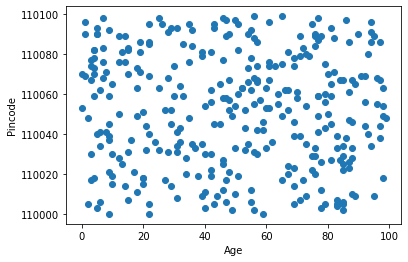

In [40]:
plt.scatter(df.Age,df['Pincode'])
plt.xlabel('Age')
plt.ylabel('Pincode')

In [41]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Pincode']])
y_predicted

array([0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0,
       1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1,

In [42]:
mergedf['cluster']=y_predicted
mergedf.head()

ValueError: Length of values (322) does not match length of index (644)

In [8]:
km.cluster_centers_

array([[1.03333333e+01, 1.10040333e+05],
       [8.46666667e+01, 1.10022000e+05],
       [6.35000000e+01, 1.10069000e+05]])

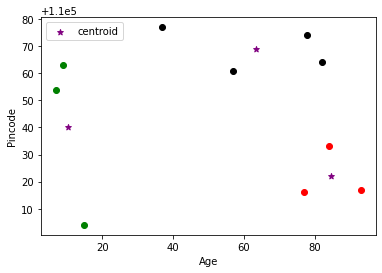

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Pincode'],color='green')
plt.scatter(df2.Age,df2['Pincode'],color='red')
plt.scatter(df3.Age,df3['Pincode'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Pincode')
plt.legend()

In [26]:
mergedf.groupby('MeSH Symptom Term')['Pincode'].mean().sort_values(ascending=False).head()

MeSH Symptom Term
Abdomen, Acute            NaN
Abdominal Pain            NaN
Acute Coronary Syndrome   NaN
Aerophagy                 NaN
Ageusia                   NaN
Name: Pincode, dtype: float64

In [27]:
price = pd.DataFrame(mergedf.groupby('MeSH Symptom Term')['Pincode'].mean())
price.head()

,Pincode
MeSH Symptom Term,
"Abdomen, Acute",NaN
Abdominal Pain,NaN
Acute Coronary Syndrome,NaN
Aerophagy,NaN
Ageusia,NaN


In [28]:
from scipy.sparse import csr_matrix

price_df_matrix = csr_matrix(price.values)

In [29]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(price_df_matrix)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [38]:
price_df_matrix.shape

(10, 5)

In [39]:
query_index = np.random.choice(df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

8


In [40]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 9:

1: 3, with distance of 3.2107730918440325e-09:
2: 10, with distance of 1.7026326537550318e-07:
3: 1, with distance of 1.7876714053510767e-07:
4: 6, with distance of 1.9229526437847255e-07:
5: 8, with distance of 1.9421046282275256e-07:
